In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

# Importando nuestros datos

Comenzamos obteniendo los archivos que contienen nuestros datasets, definiendo un path para cada uno para despues importarlos como dataframes

In [2]:
data_path_sniim = os.path.join("..","..","data","clean_data","precios_sniim.parquet")
data_path_siap = os.path.join("..","..","data","clean_data","siap.parquet.zip")
data_path_siap_wide = os.path.join("..","..","data","clean_data","siap_wide.parquet.zip")

In [3]:
df_precios_sniim = pd.read_parquet(data_path_sniim)
df_cultivos_siap = pd.read_parquet(data_path_siap)
df_cultivos_siap_wide = pd.read_parquet(data_path_siap_wide)

Después, podemos obtener algunas muestras de nuestras dataframes para verificar su estructura, las cuales están especificadas en nuestros diccionario de datos.

In [4]:
df_precios_sniim.sample(10)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
132221,2023-03-15,Rabano,Manojo,San Luis Potosí,Coahuila,"Central de Abasto de La Laguna, Torreón",20.00,22.0,22.00
1566536,2021-06-01,Sandia Sangria,Kilogramo,Campeche,Campeche,"Mercado ""Pedro Sáinz de Baranda"", Campeche",7.00,9.0,9.00
1183860,2021-02-26,Papaya Maradol,Kilogramo,Chiapas,Jalisco,Mercado Felipe Ángeles de Guadalajara,22.50,22.5,22.50
1279344,2021-10-15,Pepino,Caja de 23 kg.,Sinaloa,Durango,Centro de Distribución y Abasto de Gómez Palacio,17.00,19.9,18.00
1611471,2022-04-07,Chile Ancho,Kilogramo,Distrito Federal,Hidalgo,Central de Abasto de Pachuca,90.00,100.0,100.00
1691925,2023-10-05,Sandia Sangria,Kilogramo,Quintana Roo,Yucatán,Centro Mayorista Oxkutzcab,7.00,7.0,7.00
1600812,2022-05-30,Zanahoria Mediana,Caja de 24 kg.,Distrito Federal,Campeche,"Mercado ""Pedro Sáinz de Baranda"", Campeche",9.58,10.0,9.58
1407334,2021-02-16,Acelga,Manojo,San Luis Potosí,Durango,Centro de Distribución y Abasto de Gómez Palacio,15.00,16.0,15.00
1669533,2022-11-01,Platano Chiapas,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,11.00,11.0,11.00
386334,2023-08-03,Melon Cantaloupe #14,Caja de 14 kg.,Nuevo León,Tamaulipas,Módulo de Abasto de Reynosa,15.00,22.0,20.00


In [5]:
df_cultivos_siap_wide.sample(10)

,Entidad,Municipio,Sembrada (ha),Cosechada (ha),Siniestrada (ha),Producción,Rendimiento (udm/ha),Cultivo,fecha
129,Zacatecas,Villanueva,118.00,30.00,0.0,486.00,16.20,guayaba,2021-08-01
227,Morelos,Yecapixtla,1.70,0.00,0.0,0.00,0.00,frijol,2021-02-01
66,Michoacán,Zamora,100.00,100.00,0.0,2110.00,21.10,lechuga,2022-04-01
86,Puebla,Calpan,62.30,0.00,0.0,0.00,0.00,pera,2020-02-01
118,Hidalgo,Ixmiquilpan,3.00,0.00,0.0,0.00,0.00,aguacate,2020-01-01
5,México,Tenancingo,416.11,84.01,0.0,361321.97,4300.94,crisantemo,2022-06-01
233,Oaxaca,Santiago Huauclilla,5.00,0.00,0.0,0.00,0.00,trigo grano,2021-03-01
110,Michoacán,Epitacio Huerta,7.30,7.30,0.0,16.90,2.32,cebada grano,2020-11-01
400,Sonora,San Miguel de Horcasitas,7.00,7.00,0.0,174.00,24.86,calabacita,2021-07-01
28,Chihuahua,Delicias,7.00,7.00,0.0,287.00,41.00,pepino,2023-08-01


Antes de proseguir, podemos modificar las propiedades de seaborn para las visualizaciones que haremos mas adelante, seleccionando el estilo `whitegrid` y ajustando el tamaño de fuente a 1.2:

In [6]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

# Analisis para datos sobre precios SNIIM

Antes de comenzar, crearemos un par de columnas en nuestra dataframe para indicar tanto el mes como el año de cada entrada:

In [7]:
df_precios_sniim["año"] = df_precios_sniim["fecha"].dt.year
df_precios_sniim["mes"] = df_precios_sniim["fecha"].dt.month

Además, revisaremos nuestro dataframe para tratar de identificar datos faltantes, así como los tipos de cada una de nuestras columnas.

In [8]:
df_precios_sniim.isna().sum()

fecha           0
producto        0
presentacion    0
origen          0
destino         0
central         0
precio_min      0
precio_max      0
precio_frec     0
año             0
mes             0
dtype: int64

In [9]:
df_precios_sniim.dtypes

fecha           datetime64[us]
producto                object
presentacion            object
origen                  object
destino                 object
central                 object
precio_min             float64
precio_max             float64
precio_frec            float64
año                      int32
mes                      int32
dtype: object

De las celdas anteriores podemos aprecias que en este dataset no existen datos faltantes, y que tenemos una columna fecha tiene un tipo de dato de `datetime`, las columnas producto, presentacion, origen, destino y central tienen un tipo de `object` ya que se trata de cadenas de caracteres, y el resto tiene un tipo numérico, ya sea `float64` o `int32`.

Podemos transformar las columnas de tipo `object` al tipo `category`, para una mayor facilidad y rapidez de procesamiento de los datos.

In [10]:
df_precios_sniim["producto"] = df_precios_sniim["producto"].astype("category")
df_precios_sniim["presentacion"] = df_precios_sniim["presentacion"].astype("category")
df_precios_sniim["origen"] = df_precios_sniim["origen"].astype("category")
df_precios_sniim["destino"] = df_precios_sniim["destino"].astype("category")
df_precios_sniim["central"] = df_precios_sniim["central"].astype("category")

In [11]:
df_precios_sniim.dtypes

fecha           datetime64[us]
producto              category
presentacion          category
origen                category
destino               category
central               category
precio_min             float64
precio_max             float64
precio_frec            float64
año                      int32
mes                      int32
dtype: object

## Tendencia historica de los precios (2020 - 2023)

Para comenzar, podemos tratar de visualizar el cambio en los precios diarios para los productos de nuestro dataset. Sin embargo, existen algunos puntos importantes a considerar:
* **La cantidad de datos**, ya que nuestro dataframe cuenta con 2 019 574 entradas, para diversos precios de diferentes productos en el periodo 2020 - 2023 a lo largo del país.
* **La cantidad de productos**, en la columna `producto` de nuestro dataframe, tenemos 199 productos unicos, por lo que visualizar la variación o en el precio de cada uno al mismo tiempo puede no ser lo más práctico

In [12]:
df_precios_sniim.shape

(2019574, 11)

In [13]:
df_precios_sniim["producto"].nunique()

199

Sin embargo, podemos hacer uso de las librerias `ipywidgets` y `seaborn` para agregar interactividad a nuestros plots, esto nos permitirá agilizar el proceso de visualización de nuestros datos.

Para ello, primero definimos una función que nos generará un gráfico de los precios promedios diarios de un producto dado a lo largo del periodo seleccionado (2020 - 2023), ademas, podemos agregar una media móvil exponencial para tratar de apreciar mejor la tendencia del precio del producto a lo través del tiempo. Esto lo podemos lograr utilizando la libreria `seaborn`, ademas de los métodos `resample` y `ewm` de nuestro dataframe.

In [14]:
def graficar_precios(cultivo):
    """
    Grafica el promedio de los precios diarios de un cultivo desde el año 2020 hasta la fecha del ultimo registro, 
    ademas de una linea de tendencia (filtro exponencial)
    """
    subset_df = df_precios_sniim[df_precios_sniim["producto"] == cultivo]
    
    subset_df = subset_df.resample('D', on='fecha').mean(numeric_only=True)
    subset_df["ewm"] = subset_df["precio_frec"].ewm(span=14).mean()
    #subset_df["año"] = subset_df.index.year
    
    fig,ax = plt.subplots()
    
    sns.lineplot(x="fecha",
                 y="ewm",
                 hue="año",
                 data=subset_df,
                 errorbar=None,
                 ax=ax,
                 palette="tab10")
    
    sns.scatterplot(x="fecha",
                    y="precio_frec",
                    hue="año",
                    data=subset_df,
                    ax=ax,
                    palette="tab10",
                    s=25,
                    alpha=0.5)
    
    ax.title.set_text(f"Historial de precios para {cultivo} (promedio diario)")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio por kg, MXN")
    ax.grid(axis='y')
    ax.tick_params(axis='x',rotation=90);
    ax.legend(title='Año', labels=["2020","2021","2022","2023"])
    
    fig.set_size_inches(16,9)
    
    plt.show()
    
    return

Después obtenemos una lista de los valores únicos de la columna producto, la cual podremos utilizar en nuestro widget para seleccionar el producto de nuestro interés.

In [15]:
lista_productos = sorted(list(df_precios_sniim["producto"].unique()))
lista_anios = [2020,2021,2022,2023]
#lista_productos[:5]

Finalmente, generamos un widget de tipo `Dropdown` el cual tomará los valores de la lista anterior, y utilizando la función `interact` de `ipywidgets`, podemos generar el gráfico de tendencia del producto que seleccionemos en nuestro widget, ya que al seleccionarlo se ejecutará la funcion `graficar_precios`, la cual tomará como valor el producto seleccionado de la lista.

In [16]:
dd_productos = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

widgets.interact(graficar_precios,cultivo=dd_productos)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.graficar_precios(cultivo)>

Con la celda anterior podemos apreciar rápida y facilmente las tendencias para diversos productos, podemos ver que para productos como el **Tomate Rojo, el Saladette y el Verde**, a pesar de algunas variaciones que parecen ser estacionarias, el precio se ha mantenido en el rango de los $20.00 pesos por kilo en promedio. Sin embargo, si se repiten los patrones, puede que el precio de estos alcance un pico en los próximos meses.

Para el caso del **Limón**, podemos ver que todas las variedades de éste tuvieron un gran pico en el su precio a principios del 2022, incluso el #2 alcanzo un precio promedio diario de mas de $70.00 pesos por kilo en este periodo. Además, podemos ver que todas las variedades (#2,#3,#4,#5 y sin semilla) de este producto muestran una tendencia a la alta a lo largo de estos últimos meses.

Por otro lado, vemos que para las diversas variedades de **Manzana**, su precio promedio ha ido en constante aumento desde el 2020 hasta la fecha, y segun las tendencias más actuales, esta alza podria continuar al menos en el corto plazo.

Para el caso del **Plátano**, parece ser que tanto la variedad Chiapas como el resto han estado experimentando un lento pero constante aumento en su precio desde el 2020. El mismo comportamiento parecen estarlo experimentando las diferentes presentaciones de la **Guayaba** y la **Piña**, esta última ha estado experimentando un aumento más pronunciado en su precio promedio en las últimas semanas.


## Tendencia anual

Realizando un procedimiento similar, podemos generar una grafica específica para cada año, esto permite estudiar con un poco mas de detalles la tendencia de los precios para un año en específico (o bien, simplemente para el año en curso). Además, podemos agregar un mensaje para indicar en donde y cuando se registraron los precios más altos y más bajos para el producto en el año seleccionado.

In [17]:
def grafica_anio(cultivo,anio):
    """
    Grafica el promedio de los precios de un producto para un anio dado, ademas de una linea de tendencia
    """
    subset_df = df_precios_sniim[df_precios_sniim["producto"] == cultivo]
    subset_df = subset_df[subset_df["año"] == anio]
    
    try:
        subset_df = subset_df.resample('D', on='fecha').mean(numeric_only=True)
        subset_df["ewm"] = subset_df["precio_frec"].ewm(span=7).mean()

        fig,ax = plt.subplots()

        sns.lineplot(x="fecha",
                     y="ewm",
                     data=subset_df,
                     errorbar=None,
                     ax=ax)

        sns.scatterplot(x="fecha",
                        y="precio_frec",
                        data=subset_df,
                        ax=ax,
                        s=25,
                        alpha=0.5)

        ax.title.set_text(f"Historial de precios para {cultivo}, año: {anio} (promedio diario)")
        ax.set_xlabel("Fecha")
        ax.set_ylabel("Precio por kg, MXN")
        ax.grid(axis='y')
        ax.tick_params(axis='x',rotation=90);

        fig.set_size_inches(16,9)
        
        subset_df2 = df_precios_sniim[df_precios_sniim["producto"] == cultivo]
        subset_df2 = subset_df2[subset_df2["año"] == anio]
        
        fecha_max = subset_df2[subset_df2["precio_max"] == subset_df2["precio_max"].max()]["fecha"].iloc[0]
        central_max = subset_df2[subset_df2["precio_max"] == subset_df2["precio_max"].max()]["central"].iloc[0]
        precio_max = subset_df2["precio_max"].max()
        
        print(f"Precio maximo: ${precio_max:.2f}/kg el {fecha_max.strftime('%d-%m-%Y')} en {central_max}")
        
        fecha_min = subset_df2[subset_df2["precio_min"] == subset_df2["precio_min"].min()]["fecha"].iloc[0]
        central_min = subset_df2[subset_df2["precio_min"] == subset_df2["precio_min"].min()]["central"].iloc[0]
        precio_min = subset_df2["precio_min"].min()
        
        print(f"Precio minimo: ${precio_min:.2f}/kg el {fecha_min.strftime('%d-%m-%Y')} en {central_min}")

        plt.show()
    
    except:
        print("No hay datos para esa combinacion")
    
    return

In [18]:
dd_productos = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

dd_anios = widgets.Dropdown(options=lista_anios,
                      value=lista_anios[-1],
                      description="Año: ")

widgets.interact(grafica_anio,cultivo=dd_productos,anio=dd_anios)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.grafica_anio(cultivo, anio)>

## Distribución y variación de nuestros datos

Siguiendo una lógica similar a la anterior, podemos generar un par de gráficas que nos ayudarán a analizar mejor la distribución de los precios en el año, así como su variación. Para esto, podemos definir una función que genere un par de gráficos:

* Un diagrama de cajas (`boxplot`) de los precios del producto seleccionado **por mes**, lo cual nos puede ayudar a visualizar mejor la dispersión de nuestros precios, así como identificar posibles valores *aberrantes* (es decir, precios anormalmente altos o anormalmente bajos) en nuestros precios

* Un histograma (`histplot`) para visualizar mejor la distribución de los precios muestreados a lo largo del año.

In [19]:
def graficar_dist_precios(producto):
    """
    Genera dos diagramas:
        - Un diagrama de cajas con los datos de cada producto por mes (2023)
        - Un histograma de la distribucion de los precios para el producto dado en el anio (2023)
    """
    df = df_precios_sniim.copy()
    
    df_filter = df[(df["producto"] == producto) & (df["año"] == 2023)]
    
    try:
        fig, (ax1,ax2) = plt.subplots(2,1)

        sns.boxplot(x="mes",
                    y="precio_frec",
                    data=df_filter,
                    ax=ax1)

        ax1.title.set_text(f"Diagrama de cajas de precios por mes para {producto}")
        ax1.set_xlabel("Mes")
        ax1.set_ylabel("Precio por kg, MXN")
        
        sns.histplot(x="precio_frec",
                   data=df_filter,
                   ax=ax2,kde=True)
        
        ax2.title.set_text(f"Histograma de precios en el año para {producto}")
        ax2.set_xlabel("Precio mas frecuente")

        fig.set_size_inches(16,9)
        plt.tight_layout()
        plt.show()
    
    except:
        raise ValueError("Error! Parece que algo salio mal.")

In [20]:
dd_productos_hist = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

widgets.interact(graficar_dist_precios,producto = dd_productos_hist)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.graficar_dist_precios(producto)>

Con los diagramas anteriores, principalmente con el de cajas, podemos apreciar mejor la variabilidad de los precios, ya que en casos como el de la **Coliflor** o el **Brócoli**, si bien la mediana de los precios se mantiene aparentemente constante a lo largo del año, podemos apreciar que hay algunos meses donde la variación (rango) de los precios puede ser mas amplia que en otros, e incluso en algunos meses se pueden detectar valores anormales de los  mismos (datos aberrantes).

Además, en estos diagramas podemos apreciar también que la mayoría de los datos aberrantes, u *outliers* se encuentran ubicadas en el extremo superior de las distribuciones. Esto se ve en el diagrama de cajas como los puntos individuales que aparecen por encima del bigote superior, y en los histogramas como las colas que aparecen en el lado izquierdo de éste.

Tal es el caso de productos como el **ejote**, **zanahoria**, **perejil**, o el **pepino**, entre muchos otros. Estos outliers representan precios anormalmente altos que fueron registrados en varias centrales en el país.

## Desglose mensual de los precios

Ademas de las tendencias anuales y de las distribuciones de nuestros datos, otro de los paramétros de interés en nuestro análisis es el de los **promedios mensuales**, y más específicamente, su desglose por municipio.

De manera similar a lo anterior, podemos definir una función que nos ayude a visualizar mas facilmente estos promedios mensuales, y apoyandonos en la libreria de `ipywidgets`, podemos definir tanto el producto como la central de nuestro interés.

In [21]:
def graficar_promedios_mensuales(producto,central):
    """
    Genera una grafica (pointplot) con los promedios mensuales para el producto dado en la central dada
    """
    df = df_precios_sniim.copy()
    
    df_filter = df[(df["producto"] == producto) & (df["año"] == 2023)]
    df_grouped = df_filter.groupby(["central","mes"])["precio_frec"].mean().to_frame()
    
    df_unstacked = df_grouped.unstack()
    df_unstacked.columns = df_unstacked.columns.droplevel()
    df_unstacked = df_unstacked.reset_index()
    df_unstacked.columns.name=None
    
    df_melted = df_unstacked.melt(id_vars=["central"],var_name="mes",value_name="precio_promedio").dropna()
    
    dict_meses = {1: "Enero",
                  2: "Febrero",
                  3: "Marzo",
                  4: "Abril",
                  5: "Mayo",
                  6: "Junio",
                  7: "Julio",
                  8: "Agosto",
                  9: "Septiembre",
                  10: "Octubre",
                  11: "Noviembre",
                  12: "Diciembre"}
    
    df_melted["mes"] = df_melted["mes"].map(dict_meses)
    df_melted["precio_promedio"] = df_melted["precio_promedio"].round(2)
    df_final = df_melted[df_melted["central"] == central]
    
    try:
        fig, ax = plt.subplots()

        sns.pointplot(x="mes",
                      y="precio_promedio",
                      data=df_final,
                      ax=ax,
                      color='r',
                      errorbar=None)

        ax.title.set_text(f"Precios mensuales para {producto} en {central} (promedio mensual)")
        ax.set_xlabel("Mes")
        ax.set_ylabel("Precio por kg, MXN")
        ax.grid(axis='x')

        fig.set_size_inches(16,9)
        plt.show()
    
    except:
        raise ValueError(f"No existen datos para {producto} en {central}")

    df_final.columns = ["Central","Mes","Precio promedio por kg, MXN"]
    df_final = df_final.style.set_caption(f"Desglose de precios promedios mensuales para {producto}").hide(axis="index")
    display(df_final)
        
    return

def obtener_valores_unicos(df,columna):
    """
    Regresa una lista con los valores unicos de la columna 'columna' en el dataframe 'df', ordenados.
    """
    return sorted(list(df[columna].unique()))

def fijar_central(producto):
    """
    Genera un widget (dropdown) con todas las centrales posibles para el producto dado en el argumento, despues 
    ejecuta la funcion 'graficar_promedios_mensuales' con el producto dado en el argumento y la central seleccionada
    """
    df = df_precios_sniim.copy()
    subset_df = df[(df["producto"] == producto) & (df["año"] == 2023)]
    
    lista_centrales = obtener_valores_unicos(subset_df,"central")
    
    dd_centrales = widgets.Dropdown(options=lista_centrales,
                      value=lista_centrales[0],
                      description="Central: ")
    
    widgets.interact(graficar_promedios_mensuales,producto=widgets.fixed(producto),central=dd_centrales)
    
    return

In [22]:
dd_productos2 = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

widgets.interact(fijar_central,producto=dd_productos2)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.fijar_central(producto)>

De esta forma podemos obtener un valor más exacto del promedio mensual para cada producto en las diferentes centrales de abasto del país.

# Análisis de producción agrícola (SIAP)

Ahora podemos proceder con el análisis de los datos referentes a la producción agrícola de diversos productos agroalimentarios. Podemos comenzar tratando de identificar datos faltantes en este dataframe.

In [23]:
df_cultivos_siap_wide.isna().sum()

Entidad                 0
Municipio               0
Sembrada (ha)           0
Cosechada (ha)          0
Siniestrada (ha)        0
Producción              0
Rendimiento (udm/ha)    0
Cultivo                 0
fecha                   0
dtype: int64

In [24]:
df_cultivos_siap_wide.dtypes

Entidad                       category
Municipio                     category
Sembrada (ha)                  float64
Cosechada (ha)                 float64
Siniestrada (ha)               float64
Producción                     float64
Rendimiento (udm/ha)           float64
Cultivo                       category
fecha                   datetime64[us]
dtype: object

In [25]:
df_cultivos_siap_wide.head()

,Entidad,Municipio,Sembrada (ha),Cosechada (ha),Siniestrada (ha),Producción,Rendimiento (udm/ha),Cultivo,fecha
0,Aguascalientes,Aguascalientes,2850.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
1,Aguascalientes,Asientos,1560.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
2,Aguascalientes,Calvillo,110.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
3,Aguascalientes,Cosío,650.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
4,Aguascalientes,Jesús María,600.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01


In [26]:
def normalize(s):
    """
    Normalizar string parara eliminar espacios, mayusculas y acentos
    """
    replacements = (
        ("á", "a"),
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("í", "i"),
        ("ó", "o"),
        ("ó", "o"),
        ("ú", "u"),
        ("ñ", "ñ")
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper()).lower()
    return s

## ¿Qué cultivos analizar?

Revisando la columna `cultivo` de nuestro dataframe, podemos apreciar que tenemos un total de 64 cultivos diferentes, pero ¿realmente son todos estos relevantes para nuestro análisis?

In [27]:
df_cultivos_siap_wide["Cultivo"].unique()

['maíz forrajero en verde', 'avena grano', 'nuez', 'coliflor', 'sandía', ..., 'tuna', 'maguey pulquero', 'frijol', 'guayaba', 'espárrago']
Length: 64
Categories (64, object): ['agave', 'aguacate', 'ajo', 'ajonjolí', ..., 'tuna', 'uva', 'zanahoria', 'zarzamora']

Sin embargo, tenemos una lista de cultivos que serán relevantes para este análisis, por lo que podemos filtrar nuestro dataframe para que solo contengan las entradas referentes a estos cultivos.

In [28]:
cultivos_relevantes = ['Tomate rojo (jitomate)', 'Chile verde', 'Limón', 'Pepino', 'Plátano', 'Mango', 
              'Garbanzo grano', 'Brócoli', 'Cebolla', 'Sandía', 'Papaya', 'Calabacita', 'Lechuga', 
              'Tomate verde', 'Espárrago', 'Frambuesa', 'Nopalitos', 'Nuez', 'Fresa', 'Toronja (pomelo)', 
              'Zarzamora', 'Piña', 'Coliflor', 'Frijol', 'Berenjena', 'Uva', 'Guayaba', 'Naranja', 
              'Papa', 'Melón', 'Manzana', 'Pera', 'Durazno']

cultivos_siap = [normalize(x) for x in cultivos_relevantes]

In [29]:
df_cultivos_siap_wide.head()

,Entidad,Municipio,Sembrada (ha),Cosechada (ha),Siniestrada (ha),Producción,Rendimiento (udm/ha),Cultivo,fecha
0,Aguascalientes,Aguascalientes,2850.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
1,Aguascalientes,Asientos,1560.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
2,Aguascalientes,Calvillo,110.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
3,Aguascalientes,Cosío,650.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
4,Aguascalientes,Jesús María,600.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01


In [30]:
df_cultivos_siap_wide.columns=["entidad","municipio","sembrada_ha","cosechada_ha","siniestrada_ha","produccion_ton","rendimiento","cultivo","fecha"]

Podemos proceder a filtrar nuestro dataframe para que solo contenga estos cultivos. Lo primero es transformar nuestra columna al tipo string para poder compararla mas facilmente con nuestra lista. Además, podemos agregar columnas indicadoras de año y mes para una mejor distinción de las entradas.

In [31]:
df_cultivos_siap_wide["cultivo"] = df_cultivos_siap_wide["cultivo"].astype("string")
df_cultivos_siap_wide["cultivo"] = df_cultivos_siap_wide["cultivo"].apply(normalize)
df_cultivos_siap_wide["cultivo"] = df_cultivos_siap_wide["cultivo"].astype("string")

In [32]:
df_cultivos_siap_wide["mes"] = df_cultivos_siap_wide["fecha"].dt.month
df_cultivos_siap_wide["año"] = df_cultivos_siap_wide["fecha"].dt.year

In [33]:
df_cultivos_siap_filtered = df_cultivos_siap_wide[df_cultivos_siap_wide["cultivo"].isin(cultivos_siap)]
df_cultivos_siap_filtered[df_cultivos_siap_filtered["cultivo"]=="brocoli"].head()

,entidad,municipio,sembrada_ha,cosechada_ha,siniestrada_ha,produccion_ton,rendimiento,cultivo,fecha,mes,año
0,Aguascalientes,Aguascalientes,42.0,20.0,0.0,354.0,17.70,brocoli,2023-02-01,2,2023
1,Aguascalientes,Asientos,65.0,50.0,0.0,872.5,17.45,brocoli,2023-02-01,2,2023
2,Aguascalientes,Cosío,30.0,30.0,0.0,553.2,18.44,brocoli,2023-02-01,2,2023
3,Aguascalientes,Jesús María,20.0,20.0,0.0,300.0,15.00,brocoli,2023-02-01,2,2023
4,Aguascalientes,Pabellón de Arteaga,130.0,105.0,0.0,1837.5,17.50,brocoli,2023-02-01,2,2023


In [34]:
df_cultivos_siap_wide["cultivo"] = df_cultivos_siap_wide["cultivo"].astype("category")

In [35]:
df_cultivos_siap_filtered.loc[:,"cultivo"] = df_cultivos_siap_filtered.loc[:,"cultivo"].astype("category")

Finalmente, verificamos que la cantidad de categorias en nuestro dataframe cambio, y que ahora solo contiene los cultivos de interés.

In [36]:
df_cultivos_siap_filtered["cultivo"].unique()

['nuez', 'coliflor', 'sandia', 'mango', 'manzana', ..., 'frambuesa', 'nopalitos', 'frijol', 'guayaba', 'esparrago']
Length: 33
Categories (33, string): [berenjena, brocoli, calabacita, cebolla, ..., tomate verde, toronja (pomelo), uva, zarzamora]

## Producción agroalimentaria

Ahora, podemos comenzar a explorar de manera visual los datos contenidos en esta nueva dataframe. Podemos analizar la producción mensual de diversos cultivos en diferentes estados del país. Para ello podemos realizar un procedimiento parecido al que se hizo en la sección anterior, utilizando `ipywidgets`, `matplotlib` y `seaborn`.

In [37]:
def graficar_cultivos_mensuales(cultivo,estado):
    """
    Genera una gráfica de barras para comparar la producción mensual (en toneladas) del cultivo proporcionado en el estado proporcionado.
    """
    
    df_temp = df_cultivos_siap_filtered[(df_cultivos_siap_filtered["cultivo"] == cultivo) & (df_cultivos_siap_filtered["entidad"] == estado)]
    
    if df_temp.empty:
        print(f"No existen datos para {cultivo} en {estado}")
        return
        
    try:
        fig, ax = plt.subplots()

        sns.barplot(x="mes",
                    y="produccion_ton",
                    hue="año",
                    errorbar=None,
                    data=df_temp,
                    ax=ax)

        ax.title.set_text(f"Corte mensual de {cultivo} en {estado} (toneladas)")
        ax.set_xlabel("Mes")
        ax.set_ylabel("Producción total, toneladas")
    
        fig.set_size_inches(16,9)

        plt.show()

    except:
        raise ValueError("Vaya! Parece que algo salio mal!")

    return

def fijar_cultivo(estado):
    """
    Genera un widget (dropdown) con todos los cultivos posibles en el estado dado en el argumento, despues 
    ejecuta la funcion 'graficar_cultivos_mensuales' con el estado dado en el argumento y el cultivo seleccionado
    """
    df_temp = df_cultivos_siap_filtered.copy()
    df_temp = df_temp[(df_temp["sembrada_ha"] != 0.0) & (df_temp["cosechada_ha"] != 0.0) & (df_temp["produccion_ton"] != 0.0)]
    
    subset_df = df_temp[(df_temp["entidad"] == estado)]
    
    lista_cultivos = obtener_valores_unicos(subset_df,"cultivo")
    
    dd_cultivos_siap = widgets.Dropdown(options=lista_cultivos,
                      value=lista_cultivos[0],
                      description="Cultivo: ")
    
    widgets.interact(graficar_cultivos_mensuales,estado=widgets.fixed(estado),cultivo=dd_cultivos_siap)
    
    return

In [38]:
lista_estados = sorted(list(df_cultivos_siap_filtered["entidad"].unique()))

dd_estados_siap = widgets.Dropdown(options=lista_estados,
                      value=lista_estados[0],
                      description="Estado: ")

widgets.interact(fijar_cultivo,estado=dd_estados_siap)

interactive(children=(Dropdown(description='Estado: ', options=('Aguascalientes', 'Baja California', 'Baja Cal…

<function __main__.fijar_cultivo(estado)>

In [39]:
df_grouped_siap = df_cultivos_siap_filtered.groupby(["entidad","cultivo","año","mes"])

In [40]:
df_totales_mes_siap = df_grouped_siap[["sembrada_ha","cosechada_ha","siniestrada_ha","produccion_ton","rendimiento"]].sum()

In [41]:
df_totales_mes_siap["sembrada_ha_mes"] = df_totales_mes_siap["sembrada_ha"].diff()
df_totales_mes_siap["cosechada_ha_mes"] = df_totales_mes_siap["cosechada_ha"].diff()
df_totales_mes_siap["siniestrada_ha_mes"] = df_totales_mes_siap["siniestrada_ha"].diff()
df_totales_mes_siap["produccion_ton_mes"] = df_totales_mes_siap["produccion_ton"].diff()
df_totales_mes_siap.head(15)

sembrada_ha  cosechada_ha  siniestrada_ha  \
entidad        cultivo   año  mes                                              
Aguascalientes berenjena 2020 1            0.0           0.0             0.0   
                              2            0.0           0.0             0.0   
                              3            0.0           0.0             0.0   
                              4            0.0           0.0             0.0   
                              5            0.0           0.0             0.0   
                              6            0.0           0.0             0.0   
                              7            0.0           0.0             0.0   
                              8            0.0           0.0             0.0   
                              9            0.0           0.0             0.0   
                              10           0.0           0.0             0.0   
                              11           0.0           0.0             0.0   
                              12           0.0           0.0             0.0   
                         2021 1            0.0           0.0             0.0   
                              2            0.0           0.0             0.0   
                              3            0.0           0.0             0.0   

                                   produccion_ton  rendimiento  \
entidad        cultivo   año  mes                                
Aguascalientes berenjena 2020 1               0.0          0.0   
                              2               0.0          0.0   
                              3               0.0          0.0   
                              4               0.0          0.0   
                              5               0.0          0.0   
                              6               0.0          0.0   
                              7               0.0          0.0   
                              8               0.0          0.0   
                              9               0.0          0.0   
                              10              0.0          0.0   
                              11              0.0          0.0   
                              12              0.0          0.0   
                         2021 1               0.0          0.0   
                              2               0.0          0.0   
                              3               0.0          0.0   

                                   sembrada_ha_mes  cosechada_ha_mes  \
entidad        cultivo   año  mes                                      
Aguascalientes berenjena 2020 1                NaN               NaN   
                              2                0.0               0.0   
                              3                0.0               0.0   
                              4                0.0               0.0   
                              5                0.0               0.0   
                              6                0.0               0.0   
                              7                0.0               0.0   
                              8                0.0               0.0   
                              9                0.0               0.0   
                              10               0.0               0.0   
                              11               0.0               0.0   
                              12               0.0               0.0   
                         2021 1                0.0               0.0   
                              2                0.0               0.0   
                              3                0.0               0.0   

                                   siniestrada_ha_mes  produccion_ton_mes  
entidad        cultivo   año  mes                                          
Aguascalientes berenjena 2020 1                   NaN                 NaN  
                              2                   0.0                 0.0  
                      

In [42]:
df_totales_mes_siap = df_totales_mes_siap[(df_totales_mes_siap["sembrada_ha"] != 0.0) & (df_totales_mes_siap["cosechada_ha"] != 0.0)\
& (df_totales_mes_siap["produccion_ton"] != 0.0)]

In [43]:
df_totales_mes_siap.reset_index(inplace=True)

In [44]:
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"sembrada_ha_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"sembrada_ha"]
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"cosechada_ha_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"cosechada_ha"]
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"siniestrada_ha_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"siniestrada_ha"]
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"produccion_ton_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"produccion_ton"]

In [45]:
df_totales_mes_siap["rendimiento"] = df_totales_mes_siap["produccion_ton"] / df_totales_mes_siap["cosechada_ha"]
df_totales_mes_siap["rendimiento"] = df_totales_mes_siap["rendimiento"].round(2)

In [46]:
df_totales_mes_siap.head(15)

,entidad,cultivo,año,mes,sembrada_ha,cosechada_ha,siniestrada_ha,produccion_ton,rendimiento,sembrada_ha_mes,cosechada_ha_mes,siniestrada_ha_mes,produccion_ton_mes
0,Aguascalientes,brocoli,2020,2,440.0,425.0,0.0,7510.30,17.67,0.0,425.0,0.0,7510.30
1,Aguascalientes,brocoli,2020,3,440.0,440.0,0.0,7791.25,17.71,0.0,15.0,0.0,280.95
2,Aguascalientes,brocoli,2020,4,767.0,440.0,0.0,7791.25,17.71,327.0,0.0,0.0,0.00
3,Aguascalientes,brocoli,2020,5,912.0,440.0,0.0,7791.25,17.71,145.0,0.0,0.0,0.00
4,Aguascalientes,brocoli,2020,6,914.0,638.0,0.0,11282.44,17.68,2.0,198.0,0.0,3491.19
5,Aguascalientes,brocoli,2020,7,914.0,821.0,0.0,14609.45,17.79,0.0,183.0,0.0,3327.01
6,Aguascalientes,brocoli,2020,8,914.0,914.0,0.0,16345.51,17.88,0.0,93.0,0.0,1736.06
7,Aguascalientes,brocoli,2020,9,914.0,914.0,0.0,16345.51,17.88,0.0,0.0,0.0,0.00
8,Aguascalientes,brocoli,2020,10,914.0,914.0,0.0,16345.51,17.88,0.0,0.0,0.0,0.00
9,Aguascalientes,brocoli,2020,11,914.0,914.0,0.0,16345.51,17.88,0.0,0.0,0.0,0.00


In [47]:
def graficar_cultivos_mensuales_diff(cultivo,estado):
    """
    Genera una gráfica de barras para comparar la producción mensual (en toneladas) del cultivo proporcionado en el estado proporcionado.
    """
    
    df_temp = df_totales_mes_siap[(df_totales_mes_siap["cultivo"] == cultivo) & (df_totales_mes_siap["entidad"] == estado)]
    
    if df_temp.empty:
        print(f"No existen datos para {cultivo} en {estado}")
        return
        
    try:
        fig, ax = plt.subplots()

        sns.barplot(x="mes",
                    y="produccion_ton_mes",
                    hue="año",
                    errorbar=None,
                    data=df_temp,
                    ax=ax)

        ax.title.set_text(f"Producción mensual de {cultivo} en {estado} (toneladas)")
        ax.set_xlabel("Mes")
        ax.set_ylabel("Producción mensual, toneladas")
    
        fig.set_size_inches(16,9)

        plt.show()

    except:
        raise ValueError("Vaya! Parece que algo salio mal!")

    return

def fijar_cultivo_diff(estado):
    """
    Genera un widget (dropdown) con todos los cultivos posibles en el estado dado en el argumento, despues 
    ejecuta la funcion 'graficar_cultivos_mensuales' con el estado dado en el argumento y el cultivo seleccionado
    """
    df_temp = df_totales_mes_siap.copy()
    df_temp = df_temp[(df_temp["sembrada_ha"] != 0.0) & (df_temp["cosechada_ha"] != 0.0) & (df_temp["produccion_ton"] != 0.0)]
    
    subset_df = df_temp[(df_temp["entidad"] == estado)]
    
    lista_cultivos = obtener_valores_unicos(subset_df,"cultivo")
    
    dd_cultivos_siap = widgets.Dropdown(options=lista_cultivos,
                      value=lista_cultivos[0],
                      description="Cultivo: ")
    
    widgets.interact(graficar_cultivos_mensuales_diff,estado=widgets.fixed(estado),cultivo=dd_cultivos_siap)
    
    return

In [48]:
lista_estados_diff = sorted(list(df_totales_mes_siap["entidad"].unique()))

dd_estados_siap_diff = widgets.Dropdown(options=lista_estados_diff,
                      value=lista_estados_diff[0],
                      description="Estado: ")

widgets.interact(fijar_cultivo_diff,estado=dd_estados_siap_diff)

interactive(children=(Dropdown(description='Estado: ', options=('Aguascalientes', 'Baja California', 'Baja Cal…

<function __main__.fijar_cultivo_diff(estado)>

# Uniendo ambos datasets

In [49]:
df_sniim_siap = df_precios_sniim.copy()

In [50]:
df_sniim_siap["producto"] = df_sniim_siap["producto"].str.lower()

In [51]:
cultivos_especiales = ["tomate rojo (jitomate)","chile verde","toronja (pomelo)","nopalitos"]

In [52]:
total = 0
for cultivo in cultivos_siap:
    if cultivo in cultivos_especiales:
        continue
    
    df_temp = df_sniim_siap[df_sniim_siap["producto"].str.contains(cultivo)]
    print(f"Entradas para {cultivo}: {df_temp.shape[0]}")
    total += df_temp.shape[0]

df_temp = df_sniim_siap[df_sniim_siap["producto"].str.contains("tomate bola|tomate saladette")]
print(f"Entradas para tomate rojo (jitomate): {df_temp.shape[0]}")
total += df_temp.shape[0]

df_temp = df_sniim_siap[df_sniim_siap["producto"].str.contains("chile anaheim|chile california|chile chilaca")]
print(f"Entradas para chile verde: {df_temp.shape[0]}")
total += df_temp.shape[0]

df_temp = df_sniim_siap[df_sniim_siap["producto"].str.contains("toronja")]
print(f"Entradas para toronja (pomelo): {df_temp.shape[0]}")
total += df_temp.shape[0]

df_temp = df_sniim_siap[df_sniim_siap["producto"].str.contains("nopal")]
print(f"Entradas para nopalitos: {df_temp.shape[0]}")
total += df_temp.shape[0]

print(f"Total de entradas: {total}")

Entradas para limon: 55043
Entradas para pepino: 32129
Entradas para platano: 89748
Entradas para mango: 43696
Entradas para garbanzo grano: 0
Entradas para brocoli: 28544
Entradas para cebolla: 75836
Entradas para sandia: 31703
Entradas para papaya: 37852
Entradas para calabacita: 43980
Entradas para lechuga: 49375
Entradas para tomate verde: 32894
Entradas para esparrago: 2677
Entradas para frambuesa: 0
Entradas para nuez: 4785
Entradas para fresa: 24597
Entradas para zarzamora: 2857
Entradas para piña: 47731
Entradas para coliflor: 30422
Entradas para frijol: 0
Entradas para berenjena: 5115
Entradas para uva: 49728
Entradas para guayaba: 31063
Entradas para naranja: 46516
Entradas para papa: 78734
Entradas para melon: 35302
Entradas para manzana: 81993
Entradas para pera: 31175
Entradas para durazno: 15223
Entradas para tomate rojo (jitomate): 62988
Entradas para chile verde: 13953
Entradas para toronja (pomelo): 29468
Entradas para nopalitos: 27572
Total de entradas: 1142699


In [53]:
for cultivo in cultivos_siap:
    if cultivo in cultivos_especiales:
        continue
    df_sniim_siap.loc[df_sniim_siap["producto"].str.contains(cultivo),"cultivo_siap"] = cultivo

df_sniim_siap.loc[df_sniim_siap["producto"].str.contains("tomate bola|tomate saladette"),"cultivo_siap"] = "tomate rojo (jitomate)"
df_sniim_siap.loc[df_sniim_siap["producto"].str.contains("chile anaheim|chile california|chile chilaca"),"cultivo_siap"] = "chile verde"
df_sniim_siap.loc[df_sniim_siap["producto"].str.contains("toronja"),"cultivo_siap"] = "toronja (pomelo)"
df_sniim_siap.loc[df_sniim_siap["producto"].str.contains("nopal"),"cultivo_siap"] = "nopalitos"
df_sniim_siap.loc[df_sniim_siap['producto'].str.contains("papaya"),"cultivo_siap"] = 'papaya'

In [54]:
df_sniim_siap = df_sniim_siap[df_sniim_siap['cultivo_siap'].notna()]

In [57]:
set(df_cultivos_siap_wide["entidad"].astype("string").unique()).symmetric_difference(set(df_sniim_siap["origen"].astype("string").unique()))

{'Ciudad de México',
 'Distrito Federal',
 'Importación',
 'Nacional',
 'Sin Especificar',
 'Tlaxcala'}

In [58]:
df_sniim_siap["origen"] = df_sniim_siap["origen"].astype("string")
df_sniim_siap["origen"] = df_sniim_siap["origen"].replace("Distrito Federal","Ciudad de México")
df_sniim_siap["origen"] = df_sniim_siap["origen"].astype("category")

In [59]:
set(df_cultivos_siap_wide["entidad"].astype("string").unique()).symmetric_difference(set(df_sniim_siap["origen"].astype("string").unique()))

{'Importación', 'Nacional', 'Sin Especificar', 'Tlaxcala'}

In [60]:
set(df_totales_mes_siap["cultivo"].astype("string").unique()).symmetric_difference(set(df_sniim_siap["cultivo_siap"].astype("string").unique()))

{'frambuesa', 'frijol', 'garbanzo grano'}

In [61]:
df_sniim_siap = df_sniim_siap.groupby(["cultivo_siap","producto","origen","central","año","mes"])["precio_frec"].mean()

In [62]:
df_sniim_siap.to_frame().head(10)

precio_frec
cultivo_siap producto  origen         central                             año  mes             
berenjena    berenjena Aguascalientes Central de Abasto "Francisco Villa" 2020 1            NaN
                                                                               2            NaN
                                                                               3            NaN
                                                                               4            NaN
                                                                               5            NaN
                                                                               6            NaN
                                                                               7            NaN
                                                                               8            NaN
                                                                               9            NaN
                                                                               10           NaN

In [63]:
df_sniim_siap = df_sniim_siap.dropna().reset_index()

In [64]:
df_sniim_siap.sample(25)

,cultivo_siap,producto,origen,central,año,mes,precio_frec
41907,piña,piña chica,Nayarit,Mercado de abasto 'Adolfo López Mateos' de Tepic,2020,2,13.000000
45465,platano,platano chiapas calidad exportacion,Chiapas,Mercado Felipe Ángeles de Guadalajara,2021,3,16.034091
9189,coliflor,coliflor grande,Ciudad de México,"Mercado ""Pedro Sáinz de Baranda"", Campeche",2020,9,22.857143
13081,fresa,fresa,Nayarit,Nayarabastos de Tepic,2021,11,71.400000
39392,pepino,pepino,Sinaloa,Central de Abasto de Chihuahua,2021,7,12.120909
59739,uva,uva globo,Quintana Roo,"Mercado de Chetumal, Quintana Roo",2021,3,62.220000
861,brocoli,brocoli,Jalisco,Mercado de Abasto de Guadalajara,2023,2,11.736842
38918,pepino,pepino,Nayarit,Mercado de abasto 'Adolfo López Mateos' de Tepic,2021,9,12.238095
57204,toronja (pomelo),toronja roja,Nuevo León,Módulo de Abasto de Reynosa,2023,9,25.000000
42476,piña,piña grande,Oaxaca,Módulo de Abasto de Oaxaca,2023,6,39.444444


In [65]:
df_merged = df_sniim_siap.merge(right=df_totales_mes_siap, 
                                how="inner", 
                                left_on=["cultivo_siap","origen","año","mes"], 
                                right_on=["cultivo","entidad","año","mes"],
                                suffixes=["_sniim","_siap"])

## Análisis de correlación

In [66]:
corr = df_merged.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,año,mes,precio_frec,sembrada_ha,cosechada_ha,siniestrada_ha,produccion_ton,rendimiento,sembrada_ha_mes,cosechada_ha_mes,siniestrada_ha_mes,produccion_ton_mes
año,1.000000,-0.144501,0.132983,0.000067,-0.018139,-0.033705,-0.022300,-0.011154,0.011859,0.011600,-0.009623,0.024654
mes,-0.144501,1.000000,0.096945,-0.045822,0.039361,0.008404,0.187717,0.255539,-0.200301,-0.216971,-0.012474,-0.149650
precio_frec,0.132983,0.096945,1.000000,-0.078808,-0.084872,-0.018247,-0.067781,-0.045977,-0.031738,-0.024246,-0.003400,-0.051890
sembrada_ha,0.000067,-0.045822,-0.078808,1.000000,0.928474,0.013496,0.802623,-0.176672,0.269072,0.475028,0.004355,0.614938
cosechada_ha,-0.018139,0.039361,-0.084872,0.928474,1.000000,-0.007499,0.867051,-0.174093,0.041750,0.355066,-0.003635,0.505949
siniestrada_ha,-0.033705,0.008404,-0.018247,0.013496,-0.007499,1.000000,-0.004815,-0.003429,-0.003003,-0.003341,0.330356,-0.005112
produccion_ton,-0.022300,0.187717,-0.067781,0.802623,0.867051,-0.004815,1.000000,0.098808,-0.024194,0.205312,-0.004330,0.496970
rendimiento,-0.011154,0.255539,-0.045977,-0.176672,-0.174093,-0.003429,0.098808,1.000000,-0.077086,-0.140792,-0.001611,-0.017197
sembrada_ha_mes,0.011859,-0.200301,-0.031738,0.269072,0.041750,-0.003003,-0.024194,-0.077086,1.000000,0.393262,0.001347,0.162541
cosechada_ha_mes,0.011600,-0.216971,-0.024246,0.475028,0.355066,-0.003341,0.205312,-0.140792,0.393262,1.000000,-0.000401,0.661379


## Análisis PCA

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [68]:
df_merged.drop(columns=["cultivo_siap","entidad","sembrada_ha","cosechada_ha","siniestrada_ha","produccion_ton"],inplace=True)

In [69]:
df_merged.dtypes

producto                      object
origen                string[python]
central                     category
año                            int32
mes                            int32
precio_frec                  float64
cultivo                     category
rendimiento                  float64
sembrada_ha_mes              float64
cosechada_ha_mes             float64
siniestrada_ha_mes           float64
produccion_ton_mes           float64
dtype: object

In [70]:
df_merged["producto"] = df_merged["producto"].astype("category")
df_merged["origen"] = df_merged["origen"].astype("category")

In [71]:
# Asignar un int a cada estado
edos = sorted(list(df_merged["origen"].unique()))
edos_dict = {edo:idx+1 for idx,edo in enumerate(edos)}

# Asignar un int a cada producto
productos = sorted(list(df_merged["producto"].unique()))
productos_dict = {prod:idx+1 for idx,prod in enumerate(productos)}

# Asignar un int a cada cultivo
cultivos = sorted(list(df_merged["cultivo"].unique()))
cultivos_dict = {label:idx+1 for idx,label in enumerate(cultivos)}

# Asignar un int a cada central/mercado
mercados = sorted(list(df_merged["central"].unique()))
mercados_dict = {label:idx+1 for idx,label in enumerate(mercados)}

In [73]:
df_merged["origen"] = df_merged["origen"].map(edos_dict)
df_merged["producto"] = df_merged["producto"].map(productos_dict)
df_merged["cultivo"] = df_merged["cultivo"].map(cultivos_dict)
df_merged["central"] = df_merged["central"].map(mercados_dict)

In [74]:
df_merged.head()

,producto,origen,central,año,mes,precio_frec,cultivo,rendimiento,sembrada_ha_mes,cosechada_ha_mes,siniestrada_ha_mes,produccion_ton_mes
0,1,16,30,2020,8,32.222222,1.0,10.43,5.0,0.0,0.0,0.00
1,1,16,30,2020,9,32.350000,1.0,10.46,1.0,5.1,0.0,53.45
2,1,16,30,2020,10,33.500000,1.0,10.94,0.0,0.4,0.0,8.20
3,1,16,30,2020,11,41.210526,1.0,10.94,0.0,0.0,0.0,0.00
4,1,16,30,2020,12,42.545455,1.0,10.95,0.0,1.0,0.0,11.10


In [97]:
X = df_merged.drop('cultivo', axis=1)

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

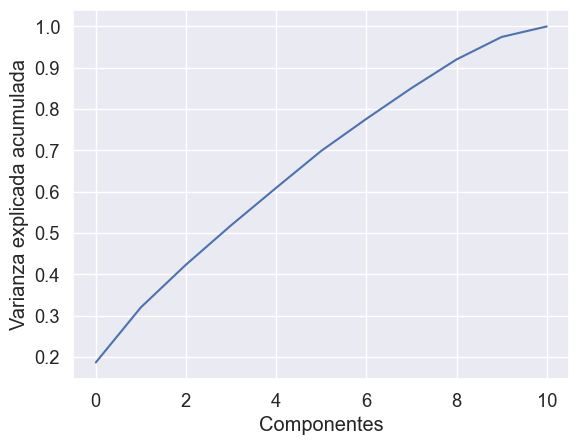

In [99]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada acumulada');

In [100]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [101]:
X_pca = pca.transform(X_scaled)

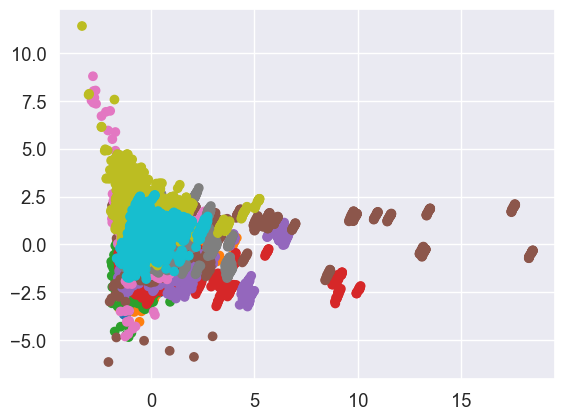

In [102]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=df_merged["cultivo"],cmap="tab10")
plt.show()

In [107]:
X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=100).fit_transform(X_scaled) 

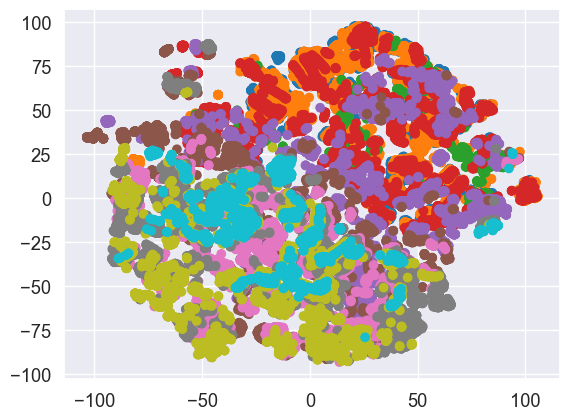

In [108]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=df_merged["cultivo"],cmap="tab10")
plt.show()